In [1]:

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


# Importing Liabraries

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 723.1/723.1 kB 17.9 MB/s eta 0:00:00


In [3]:
# Importing the required libraries
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns
import yaml
import matplotlib.patches as patches

sns.set_style('darkgrid')

In [4]:
import yaml

# Define the dataset information
dataset_info = {
    'train': '/kaggle/input/sr-det/sat-low-256x256/train/images',
    'val': '/kaggle/input/sr-det/sat-low-256x256/val/images',
    'test': '/kaggle/input/sr-det/sat-low-256x256/test/images',
    'nc': 11,
    'names': ['airplane', 'boat', 'car', 'cargo ship', 'fighter jet', 'helicopter', 'jet', 'military aircraft', 'propeller plane', 'truck', 'yacht']
}

# Create and save the data.yaml file
data_yaml_path = '/kaggle/working/data.yaml'
with open(data_yaml_path, 'w') as yaml_file:
    yaml.dump(dataset_info, yaml_file, default_flow_style=False)

# Data Visualization

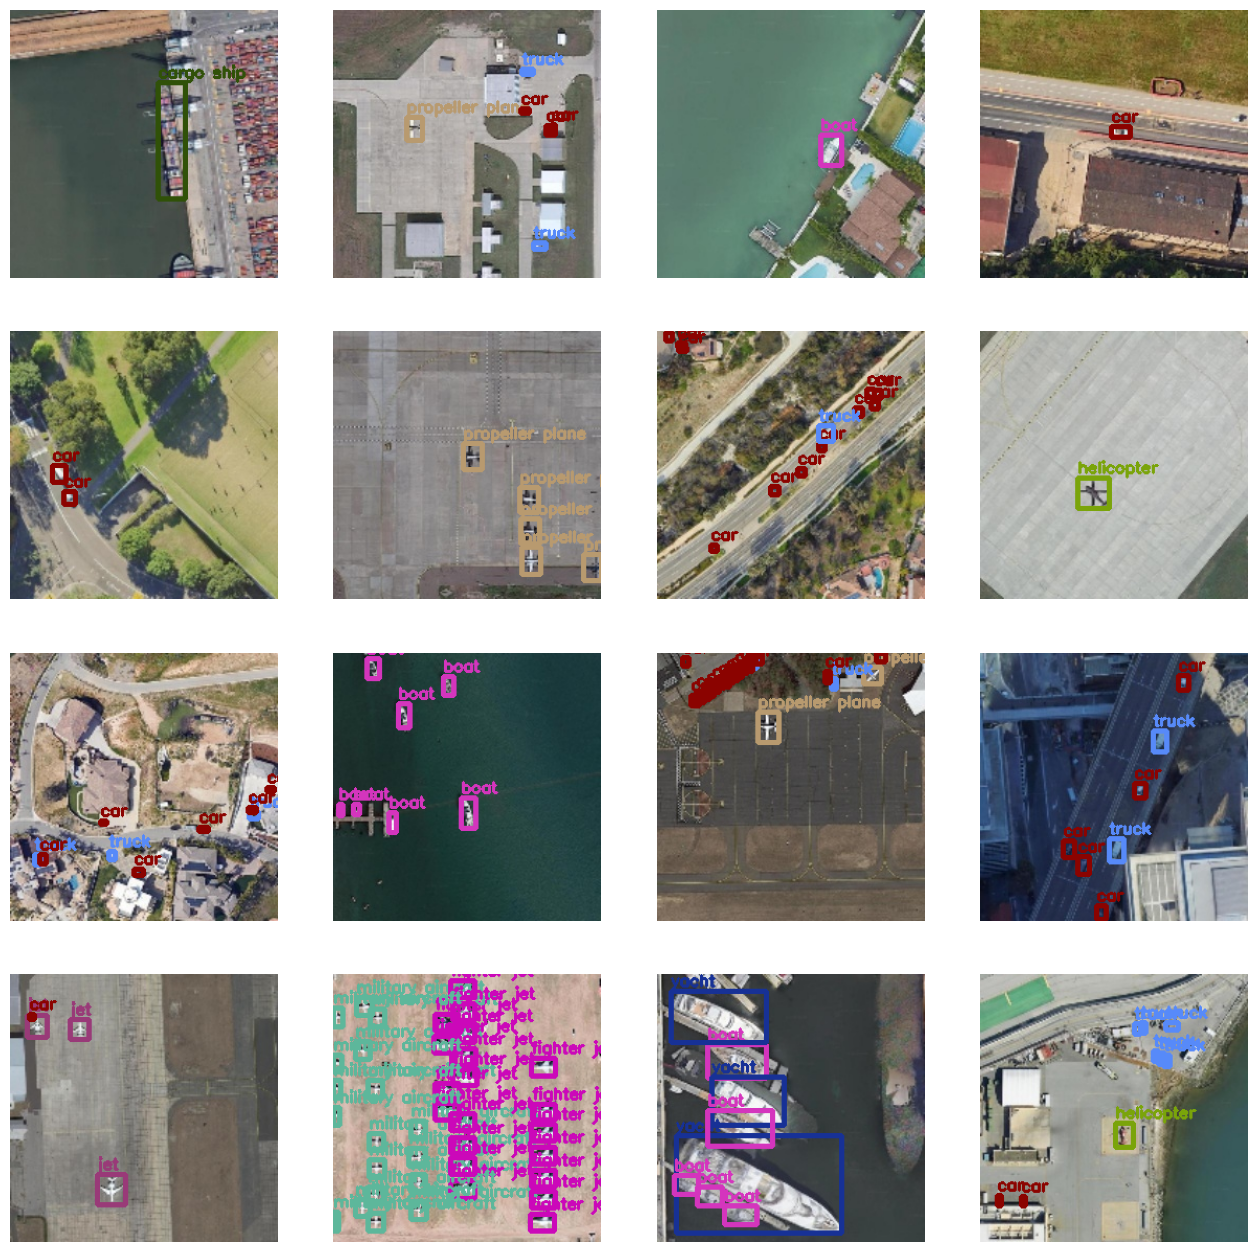

In [5]:
# Define the paths to the images and labels directories
train_images = "/kaggle/input/sr-det/sat-low-256x256/train/images"
train_labels = "/kaggle/input/sr-det/sat-low-256x256/train/labels"

test_images = "/kaggle/input/sr-det/sat-low-256x256/test/images"
test_labels = "/kaggle/input/sr-det/sat-low-256x256/test/labels"

val_images = "/kaggle/input/sr-det/sat-low-256x256/val/images"
val_labels = "/kaggle/input/sr-det/sat-low-256x256/val/labels"

# Load class information from the YAML file
yaml_path = '/kaggle/working/data.yaml'
with open(yaml_path, "r") as f:
    data = yaml.load(f, Loader=yaml.FullLoader)
classes = data["names"]

# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Function to generate a random color
def random_color():
    return tuple(random.randint(0, 255) for _ in range(3))

# Assign different colors to each class
class_colors = {class_name: random_color() for class_name in classes}

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4
    
    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        
        # Use the color assigned to the class
        color = class_colors[classes[int(class_id)]]
        
        # Draw the rectangle with the assigned color
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, 3)
        
        # Add class label to the rectangle
        class_name = classes[int(class_id)]
        cv2.putText(image, class_name, (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()


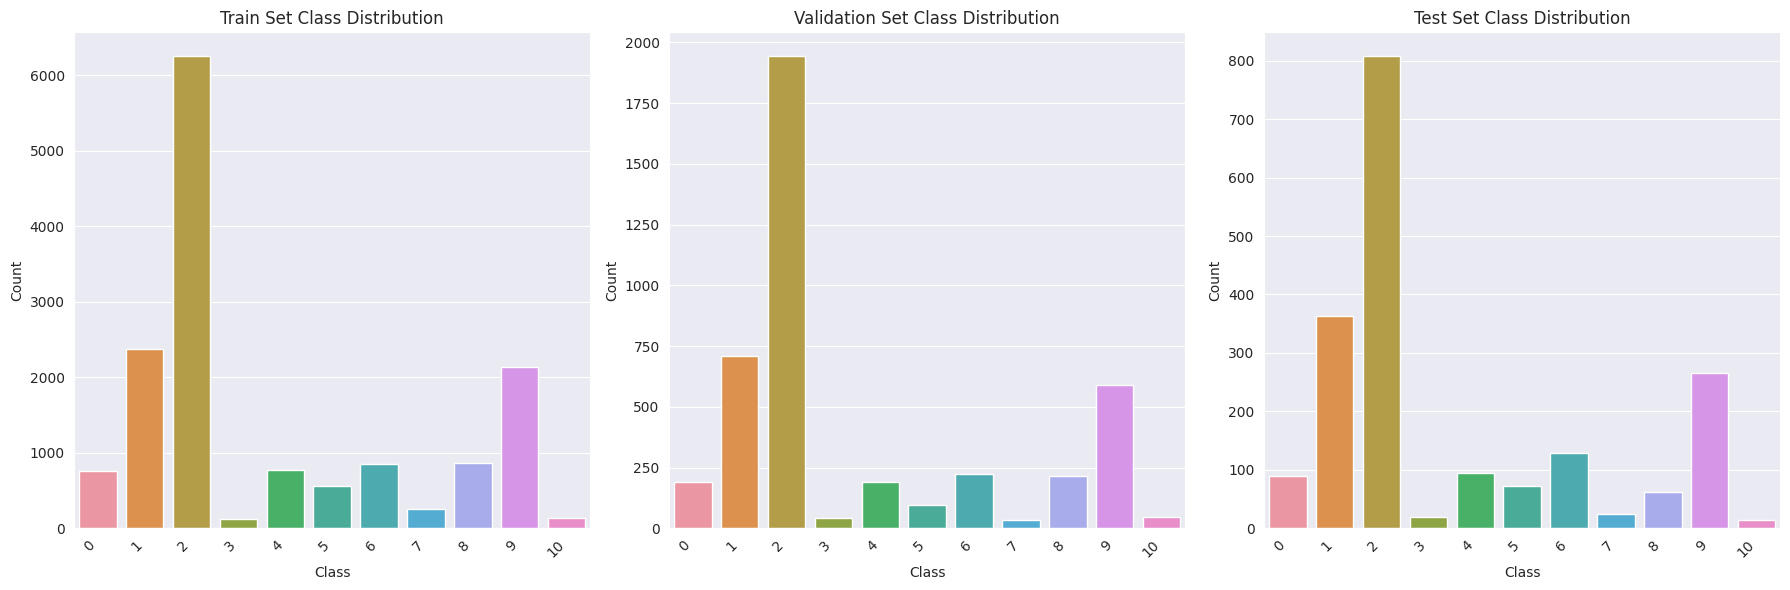

In [6]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

def parse_yolov8_annotations(annotation_path):
    annotations = []
    with open(annotation_path, 'r') as file:
        for line in file:
            line = line.strip().split()
            class_label = int(line[0])
            annotations.append(class_label)
    return annotations

# Replace these paths with your actual paths
train_path = "/kaggle/input/sr-det/sat-low-256x256/train/labels/"
valid_path = "/kaggle/input/sr-det/sat-low-256x256/val/labels/"
test_path = "/kaggle/input/sr-det/sat-low-256x256/test/labels/"

# Load annotations for train, validation, and test sets
train_annotations = []
valid_annotations = []
test_annotations = []

for file_name in os.listdir(train_path):
    train_annotations.extend(parse_yolov8_annotations(os.path.join(train_path, file_name)))

for file_name in os.listdir(valid_path):
    valid_annotations.extend(parse_yolov8_annotations(os.path.join(valid_path, file_name)))

for file_name in os.listdir(test_path):
    test_annotations.extend(parse_yolov8_annotations(os.path.join(test_path, file_name)))

# Convert to Pandas DataFrame
train_df = pd.DataFrame({'class': train_annotations})
valid_df = pd.DataFrame({'class': valid_annotations})
test_df = pd.DataFrame({'class': test_annotations})

# Plot class distribution for train set
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.countplot(x='class', data=train_df)
plt.title('Train Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Plot class distribution for validation set
plt.subplot(1, 3, 2)
sns.countplot(x='class', data=valid_df)
plt.title('Validation Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Plot class distribution for test set
plt.subplot(1, 3, 3)
sns.countplot(x='class', data=test_df)
plt.title('Test Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


# Building & Training Model

In [7]:
#disable wandb
import os
os.environ["WANDB_DISABLED"] = "true"

In [8]:
# Loading a pretrained model
model = YOLO('yolov8x.pt')

# Training the model
model.train(data = '/kaggle/working/data.yaml',
            epochs =100,
            imgsz = 256,
            seed = 42,
            batch = 8,
            workers = 4,
            project='yolo8',  # Specify your project name
            name='result') 

100%|██████████| 131M/131M [00:00<00:00, 287MB/s]


Ultralytics YOLOv8.1.33 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/working/data.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=4, project=yolo8, name=result, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

100%|██████████| 755k/755k [00:00<00:00, 21.8MB/s]
2024-03-24 16:01:37,239	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-03-24 16:01:38,052	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-03-24 16:01:40.307974: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-24 16:01:40.308096: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-24 16:01:40.443763: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS facto

Overriding model.yaml nc=80 with nc=11

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytic

wandb: Tracking run with wandb version 0.16.4
wandb: W&B syncing is set to `offline` in this directory.  
wandb: Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 102MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/sr-det/sat-low-256x256/train/labels... 1470 images, 3 backgrounds, 0 corrupt: 100%|██████████| 1470/1470 [00:03<00:00, 436.21it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/sr-det/sat-low-256x256/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/sr-det/sat-low-256x256/val/labels... 420 images, 0 backgrounds, 0 corrupt: 100%|██████████| 420/420 [00:01<00:00, 416.35it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/sr-det/sat-low-256x256/val is not writeable, cache not saved.


Plotting labels to yolo8/result/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 256 train, 256 val
Using 4 dataloader workers
Logging results to yolo8/result
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.63G      1.704      2.235      1.066         70        256: 100%|██████████| 184/184 [00:39<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  4.89it/s]


                   all        420       4279       0.36      0.437       0.34      0.201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.89G      1.672      1.654      1.036         88        256: 100%|██████████| 184/184 [00:34<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.34it/s]

                   all        420       4279      0.359      0.398      0.335      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.94G      1.704      1.582      1.048         78        256: 100%|██████████| 184/184 [00:33<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.23it/s]

                   all        420       4279      0.372       0.53      0.461      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       3.9G      1.674      1.545      1.038         50        256: 100%|██████████| 184/184 [00:33<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.34it/s]

                   all        420       4279      0.579        0.4      0.457      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.93G      1.697      1.509      1.039         54        256: 100%|██████████| 184/184 [00:33<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.35it/s]

                   all        420       4279       0.46      0.542      0.475       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.93G      1.631      1.428      1.009         85        256: 100%|██████████| 184/184 [00:33<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.31it/s]

                   all        420       4279      0.649       0.61      0.626      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.94G        1.6      1.377      0.998         76        256: 100%|██████████| 184/184 [00:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.24it/s]

                   all        420       4279      0.577      0.548      0.513      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.93G      1.549      1.307     0.9971        113        256: 100%|██████████| 184/184 [00:33<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.35it/s]

                   all        420       4279      0.663      0.577      0.627      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.93G      1.532      1.247     0.9807         68        256: 100%|██████████| 184/184 [00:33<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.36it/s]

                   all        420       4279      0.599      0.605      0.624      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       3.9G      1.504      1.235     0.9866        130        256: 100%|██████████| 184/184 [00:33<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.34it/s]

                   all        420       4279       0.72      0.614      0.657      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.94G      1.501      1.199     0.9779         98        256: 100%|██████████| 184/184 [00:33<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.20it/s]

                   all        420       4279      0.689      0.691      0.717      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       3.9G      1.462      1.155     0.9717        121        256: 100%|██████████| 184/184 [00:33<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.32it/s]

                   all        420       4279      0.768      0.638      0.701      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.94G      1.437      1.119     0.9641         78        256: 100%|██████████| 184/184 [00:33<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.34it/s]

                   all        420       4279      0.622      0.619      0.657      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.93G      1.449      1.143     0.9611         44        256: 100%|██████████| 184/184 [00:33<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.20it/s]

                   all        420       4279      0.711      0.648      0.702      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.93G       1.42      1.106     0.9555         93        256: 100%|██████████| 184/184 [00:33<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.34it/s]

                   all        420       4279      0.792      0.642      0.715      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.91G      1.411      1.084     0.9546         69        256: 100%|██████████| 184/184 [00:33<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.33it/s]

                   all        420       4279      0.691      0.653      0.696      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.92G        1.4      1.081     0.9471         57        256: 100%|██████████| 184/184 [00:33<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.36it/s]

                   all        420       4279      0.733      0.658      0.712      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.93G      1.395      1.038     0.9391         89        256: 100%|██████████| 184/184 [00:33<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.37it/s]

                   all        420       4279        0.7      0.665      0.713      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       3.9G      1.386      1.053     0.9469         31        256: 100%|██████████| 184/184 [00:33<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.25it/s]

                   all        420       4279      0.728      0.648      0.704      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.92G      1.357      1.009     0.9293         57        256: 100%|██████████| 184/184 [00:33<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.33it/s]

                   all        420       4279      0.684       0.69      0.717      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.93G      1.363     0.9992      0.939         28        256: 100%|██████████| 184/184 [00:33<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.40it/s]

                   all        420       4279      0.706      0.674      0.705      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.93G      1.332     0.9793     0.9345         74        256: 100%|██████████| 184/184 [00:33<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.42it/s]

                   all        420       4279      0.738      0.691      0.736      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.92G      1.331     0.9925     0.9421        115        256: 100%|██████████| 184/184 [00:33<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.47it/s]

                   all        420       4279      0.726      0.694      0.742      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       3.9G      1.336     0.9845     0.9357         80        256: 100%|██████████| 184/184 [00:33<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.37it/s]

                   all        420       4279      0.717      0.644      0.717       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.93G      1.315     0.9667     0.9249         59        256: 100%|██████████| 184/184 [00:33<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.42it/s]

                   all        420       4279      0.726      0.675      0.727      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.93G      1.267     0.9101     0.9276        105        256: 100%|██████████| 184/184 [00:33<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.44it/s]

                   all        420       4279      0.781      0.695      0.758      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.92G        1.3     0.9283     0.9287         53        256: 100%|██████████| 184/184 [00:33<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.41it/s]

                   all        420       4279      0.792      0.694      0.763      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.93G       1.29     0.9212     0.9263         53        256: 100%|██████████| 184/184 [00:33<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.41it/s]

                   all        420       4279      0.774        0.7      0.737      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       3.9G      1.265     0.9063     0.9158         56        256: 100%|██████████| 184/184 [00:33<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.46it/s]

                   all        420       4279      0.776      0.693      0.766      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.92G      1.239     0.8734     0.9188         86        256: 100%|██████████| 184/184 [00:33<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.46it/s]

                   all        420       4279      0.754      0.724       0.76      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       3.9G      1.266     0.8874     0.9119         28        256: 100%|██████████| 184/184 [00:33<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.99it/s]

                   all        420       4279      0.778      0.694      0.774      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.89G      1.263      0.882     0.9097        100        256: 100%|██████████| 184/184 [00:33<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.46it/s]

                   all        420       4279      0.804      0.702       0.77      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.93G      1.274     0.9065     0.9095        112        256: 100%|██████████| 184/184 [00:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.45it/s]

                   all        420       4279      0.786      0.705      0.763       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.92G      1.222      0.875     0.9096         43        256: 100%|██████████| 184/184 [00:33<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.40it/s]

                   all        420       4279      0.772      0.704      0.768      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.93G      1.226     0.8462     0.9063         52        256: 100%|██████████| 184/184 [00:33<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.43it/s]

                   all        420       4279      0.754      0.721      0.764      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       3.9G      1.238     0.8604     0.9081         56        256: 100%|██████████| 184/184 [00:33<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.45it/s]

                   all        420       4279       0.73      0.738      0.772      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.91G      1.208     0.8338     0.8967         82        256: 100%|██████████| 184/184 [00:33<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.40it/s]

                   all        420       4279      0.752      0.711      0.765      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       3.9G      1.219     0.8459     0.9062         71        256: 100%|██████████| 184/184 [00:33<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.44it/s]

                   all        420       4279      0.787      0.718      0.783      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       3.9G       1.19     0.7975     0.9043         26        256: 100%|██████████| 184/184 [00:33<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.48it/s]

                   all        420       4279      0.784      0.715       0.77      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.92G      1.189     0.8183     0.9003        135        256: 100%|██████████| 184/184 [00:33<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.31it/s]

                   all        420       4279      0.815      0.728      0.792       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       3.9G      1.175     0.7923     0.9018         27        256: 100%|██████████| 184/184 [00:33<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.31it/s]

                   all        420       4279      0.794      0.728      0.777      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       3.9G      1.179     0.7803     0.8903         57        256: 100%|██████████| 184/184 [00:33<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.34it/s]

                   all        420       4279      0.777      0.733      0.784       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100       3.9G      1.184      0.791      0.897         29        256: 100%|██████████| 184/184 [00:33<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.41it/s]

                   all        420       4279      0.802      0.737      0.791      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100       3.9G      1.163     0.7887     0.9039         74        256: 100%|██████████| 184/184 [00:33<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.39it/s]

                   all        420       4279      0.811       0.73      0.798      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100       3.9G      1.194     0.8111     0.9023         94        256: 100%|██████████| 184/184 [00:33<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.37it/s]

                   all        420       4279      0.808      0.736      0.798      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.93G      1.187     0.7909     0.8995         32        256: 100%|██████████| 184/184 [00:33<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.43it/s]

                   all        420       4279      0.811      0.738      0.788      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.93G      1.161     0.7749     0.8931         75        256: 100%|██████████| 184/184 [00:33<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.46it/s]

                   all        420       4279      0.802      0.734      0.794      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.93G      1.155      0.767     0.8942         77        256: 100%|██████████| 184/184 [00:33<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.42it/s]

                   all        420       4279      0.784      0.746      0.794      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100       3.9G      1.157     0.7597     0.8928         34        256: 100%|██████████| 184/184 [00:33<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.41it/s]

                   all        420       4279      0.796      0.736      0.793      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.93G      1.138     0.7487     0.8858         95        256: 100%|██████████| 184/184 [00:33<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.39it/s]

                   all        420       4279      0.779      0.741      0.797      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.92G      1.164     0.7618     0.8929         98        256: 100%|██████████| 184/184 [00:33<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.46it/s]

                   all        420       4279      0.809      0.757      0.804      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       3.9G      1.126     0.7488     0.8886         52        256: 100%|██████████| 184/184 [00:33<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.44it/s]

                   all        420       4279      0.804      0.741        0.8      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.94G      1.125     0.7255     0.8867         70        256: 100%|██████████| 184/184 [00:33<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.47it/s]

                   all        420       4279      0.817       0.75      0.805      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100       3.9G      1.122     0.7323     0.8829         57        256: 100%|██████████| 184/184 [00:33<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.41it/s]

                   all        420       4279       0.84      0.743      0.805      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.93G      1.115     0.7259     0.8863         71        256: 100%|██████████| 184/184 [00:33<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.24it/s]

                   all        420       4279      0.829      0.749      0.809      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.93G       1.11     0.7091       0.88         73        256: 100%|██████████| 184/184 [00:33<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.50it/s]

                   all        420       4279      0.783      0.768      0.806      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100       3.9G      1.104     0.7075     0.8816        110        256: 100%|██████████| 184/184 [00:33<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.43it/s]

                   all        420       4279      0.818      0.753      0.802      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.92G      1.094     0.7055     0.8802         66        256: 100%|██████████| 184/184 [00:33<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.28it/s]

                   all        420       4279      0.785       0.77      0.803      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.92G      1.097     0.6983     0.8794        145        256: 100%|██████████| 184/184 [00:33<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.43it/s]

                   all        420       4279      0.793      0.766       0.81      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100       3.9G      1.099     0.7058     0.8774         72        256: 100%|██████████| 184/184 [00:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.42it/s]

                   all        420       4279      0.812      0.765      0.813      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.89G      1.079     0.6891     0.8755        104        256: 100%|██████████| 184/184 [00:33<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.37it/s]

                   all        420       4279      0.798      0.765      0.811      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.92G      1.075     0.6807     0.8787         52        256: 100%|██████████| 184/184 [00:33<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.41it/s]

                   all        420       4279      0.802      0.766      0.808      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       3.9G      1.063     0.6811     0.8765         54        256: 100%|██████████| 184/184 [00:33<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.42it/s]

                   all        420       4279      0.806      0.787      0.818      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.93G      1.054     0.6475      0.873        108        256: 100%|██████████| 184/184 [00:33<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.42it/s]

                   all        420       4279      0.804      0.764      0.813      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.92G      1.055     0.6793     0.8766         31        256: 100%|██████████| 184/184 [00:33<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.43it/s]

                   all        420       4279      0.834      0.751      0.815      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100       3.9G      1.058     0.6595     0.8738         57        256: 100%|██████████| 184/184 [00:33<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.39it/s]

                   all        420       4279      0.811      0.765      0.816       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.92G      1.055     0.6623     0.8711        110        256: 100%|██████████| 184/184 [00:33<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.37it/s]

                   all        420       4279      0.819      0.775      0.826      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100       3.9G      1.058     0.6691     0.8803         91        256: 100%|██████████| 184/184 [00:33<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.48it/s]

                   all        420       4279      0.807      0.769       0.82      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.94G      1.054     0.6586     0.8698         61        256: 100%|██████████| 184/184 [00:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.46it/s]

                   all        420       4279      0.811      0.763      0.818      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.91G      1.058     0.6619     0.8719         84        256: 100%|██████████| 184/184 [00:33<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.40it/s]

                   all        420       4279      0.811      0.778      0.821      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.93G      1.061     0.6574     0.8697        125        256: 100%|██████████| 184/184 [00:33<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.45it/s]

                   all        420       4279        0.8      0.772      0.824      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.92G      1.057     0.6388     0.8737         82        256: 100%|██████████| 184/184 [00:33<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.49it/s]

                   all        420       4279      0.826      0.764      0.825      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       3.9G      1.033     0.6248     0.8681         52        256: 100%|██████████| 184/184 [00:33<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.38it/s]

                   all        420       4279      0.807      0.777      0.822      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.93G      1.019     0.6287     0.8714         66        256: 100%|██████████| 184/184 [00:33<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.21it/s]

                   all        420       4279      0.818      0.771      0.823      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.93G      1.028     0.6228     0.8654         54        256: 100%|██████████| 184/184 [00:33<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.46it/s]

                   all        420       4279      0.811      0.786      0.825      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.89G      1.012     0.6155      0.867         64        256: 100%|██████████| 184/184 [00:33<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.38it/s]

                   all        420       4279      0.808      0.783      0.825      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.93G      1.026     0.6299      0.866         79        256: 100%|██████████| 184/184 [00:33<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.45it/s]

                   all        420       4279      0.812      0.783      0.823      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.93G      1.018     0.6164     0.8685         60        256: 100%|██████████| 184/184 [00:33<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.44it/s]

                   all        420       4279      0.796      0.788      0.823      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.93G      1.012     0.6104     0.8647         56        256: 100%|██████████| 184/184 [00:33<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.32it/s]

                   all        420       4279      0.819      0.781       0.83      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.93G      1.014     0.6237     0.8696        139        256: 100%|██████████| 184/184 [00:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.46it/s]

                   all        420       4279      0.818      0.769      0.816      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.93G     0.9857     0.5974     0.8604         36        256: 100%|██████████| 184/184 [00:33<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.46it/s]

                   all        420       4279      0.803      0.784       0.82      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100       3.9G      0.994     0.5874     0.8589         28        256: 100%|██████████| 184/184 [00:33<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.43it/s]

                   all        420       4279      0.803      0.789      0.826      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.93G     0.9852     0.5943     0.8598         42        256: 100%|██████████| 184/184 [00:33<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.42it/s]

                   all        420       4279      0.789      0.789      0.824      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.93G     0.9941     0.6031     0.8603         59        256: 100%|██████████| 184/184 [00:33<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.36it/s]

                   all        420       4279      0.805        0.8      0.836      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.93G     0.9772     0.5846     0.8579         45        256: 100%|██████████| 184/184 [00:33<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.42it/s]

                   all        420       4279      0.829      0.785      0.834      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100       3.9G     0.9838     0.5876     0.8608         36        256: 100%|██████████| 184/184 [00:33<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.37it/s]

                   all        420       4279      0.802       0.79      0.828      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.93G     0.9666     0.5749     0.8526         74        256: 100%|██████████| 184/184 [00:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.46it/s]

                   all        420       4279      0.837      0.778       0.83      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.93G      0.974     0.5839     0.8566         45        256: 100%|██████████| 184/184 [00:33<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.45it/s]

                   all        420       4279      0.835      0.796      0.838      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.94G     0.9616     0.5713     0.8559         51        256: 100%|██████████| 184/184 [00:33<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.44it/s]

                   all        420       4279      0.815      0.805      0.835      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.93G     0.9623     0.5687     0.8559         93        256: 100%|██████████| 184/184 [00:33<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.37it/s]

                   all        420       4279      0.815      0.796      0.835       0.61


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.93G     0.9333     0.5384     0.8548         67        256: 100%|██████████| 184/184 [00:35<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.34it/s]

                   all        420       4279      0.809       0.79      0.826      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       3.9G      0.937     0.5414     0.8539         40        256: 100%|██████████| 184/184 [00:33<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.34it/s]

                   all        420       4279      0.831      0.776       0.83      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.89G     0.9244     0.5331     0.8462         61        256: 100%|██████████| 184/184 [00:33<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.32it/s]

                   all        420       4279       0.81      0.799      0.832      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.93G     0.9254     0.5315     0.8416         31        256: 100%|██████████| 184/184 [00:33<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.31it/s]

                   all        420       4279      0.826      0.787      0.831      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.92G     0.9231      0.526     0.8459         67        256: 100%|██████████| 184/184 [00:33<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.41it/s]

                   all        420       4279       0.82      0.802      0.838      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.93G     0.9027     0.5166     0.8428        103        256: 100%|██████████| 184/184 [00:33<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.35it/s]

                   all        420       4279      0.825       0.79      0.833      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100       3.9G     0.8974     0.5118     0.8367         42        256: 100%|██████████| 184/184 [00:33<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.34it/s]

                   all        420       4279      0.805      0.804      0.833      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.94G     0.9179     0.5185      0.842         48        256: 100%|██████████| 184/184 [00:33<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.95it/s]

                   all        420       4279      0.817      0.805      0.835      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100       3.9G     0.8849     0.5005     0.8411         15        256: 100%|██████████| 184/184 [00:33<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.37it/s]

                   all        420       4279      0.818      0.804      0.835      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100       3.9G     0.8883      0.504     0.8379        120        256: 100%|██████████| 184/184 [00:33<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.40it/s]

                   all        420       4279      0.818      0.808      0.834      0.609



100 epochs completed in 1.170 hours.
Optimizer stripped from yolo8/result/weights/last.pt, 136.7MB
Optimizer stripped from yolo8/result/weights/best.pt, 136.7MB

Validating yolo8/result/weights/best.pt...
Ultralytics YOLOv8.1.33 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 268 layers, 68134161 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  11%|█         | 3/27 [00:04<00:45,  1.91s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:13<00:00,  2.04it/s]


                   all        420       4279       0.82      0.803      0.838      0.611
              airplane        420        189      0.884      0.963      0.958      0.759
                  boat        420        710      0.867      0.813      0.876      0.579
                   car        420       1944      0.774      0.522      0.638      0.333
            cargo ship        420         41      0.779      0.854      0.834      0.713
           fighter jet        420        190       0.98      0.937      0.979      0.755
            helicopter        420         96      0.925      0.969      0.969      0.695
                   jet        420        223      0.871      0.852      0.898      0.673
     military aircraft        420         34      0.949      0.941      0.966      0.758
       propeller plane        420        215      0.893       0.86      0.906      0.624
                 truck        420        589      0.524       0.32      0.405      0.249
                 yach

wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ▃████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
wandb:                  lr/pg1 ▃████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
wandb:                  lr/pg2 ▃████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
wandb:        metrics/mAP50(B) ▁▃▅▅▆▅▆▆▆▇▇▇▇▇▇▇▇▇▇▇████████████████████
wandb:     metrics/mAP50-95(B) ▁▂▄▄▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇██████████████
wandb:    metrics/precision(B) ▁▁▅▅▆▅▆▆▆▆▇▇▇▇▆▇▇██▇██▇▇▇▇██████▇▇████▇█
wandb:       metrics/recall(B) ▁▃▄▄▆▄▅▅▆▆▆▆▆▆▇▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇████▇█▇███
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss ██▇▇▆▆▅▅▅▅▄▄▄▄▄▄▃▃▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁
wandb:          train/cls_loss █▅▅▄▄▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
wandb:          train/dfl_loss █▇▆▆▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▁▁▁
wandb:            val/box_loss ▇█▇▆▅▅▄▄▄▃▄▃▃▃▃▂▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d6df65e9420>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.

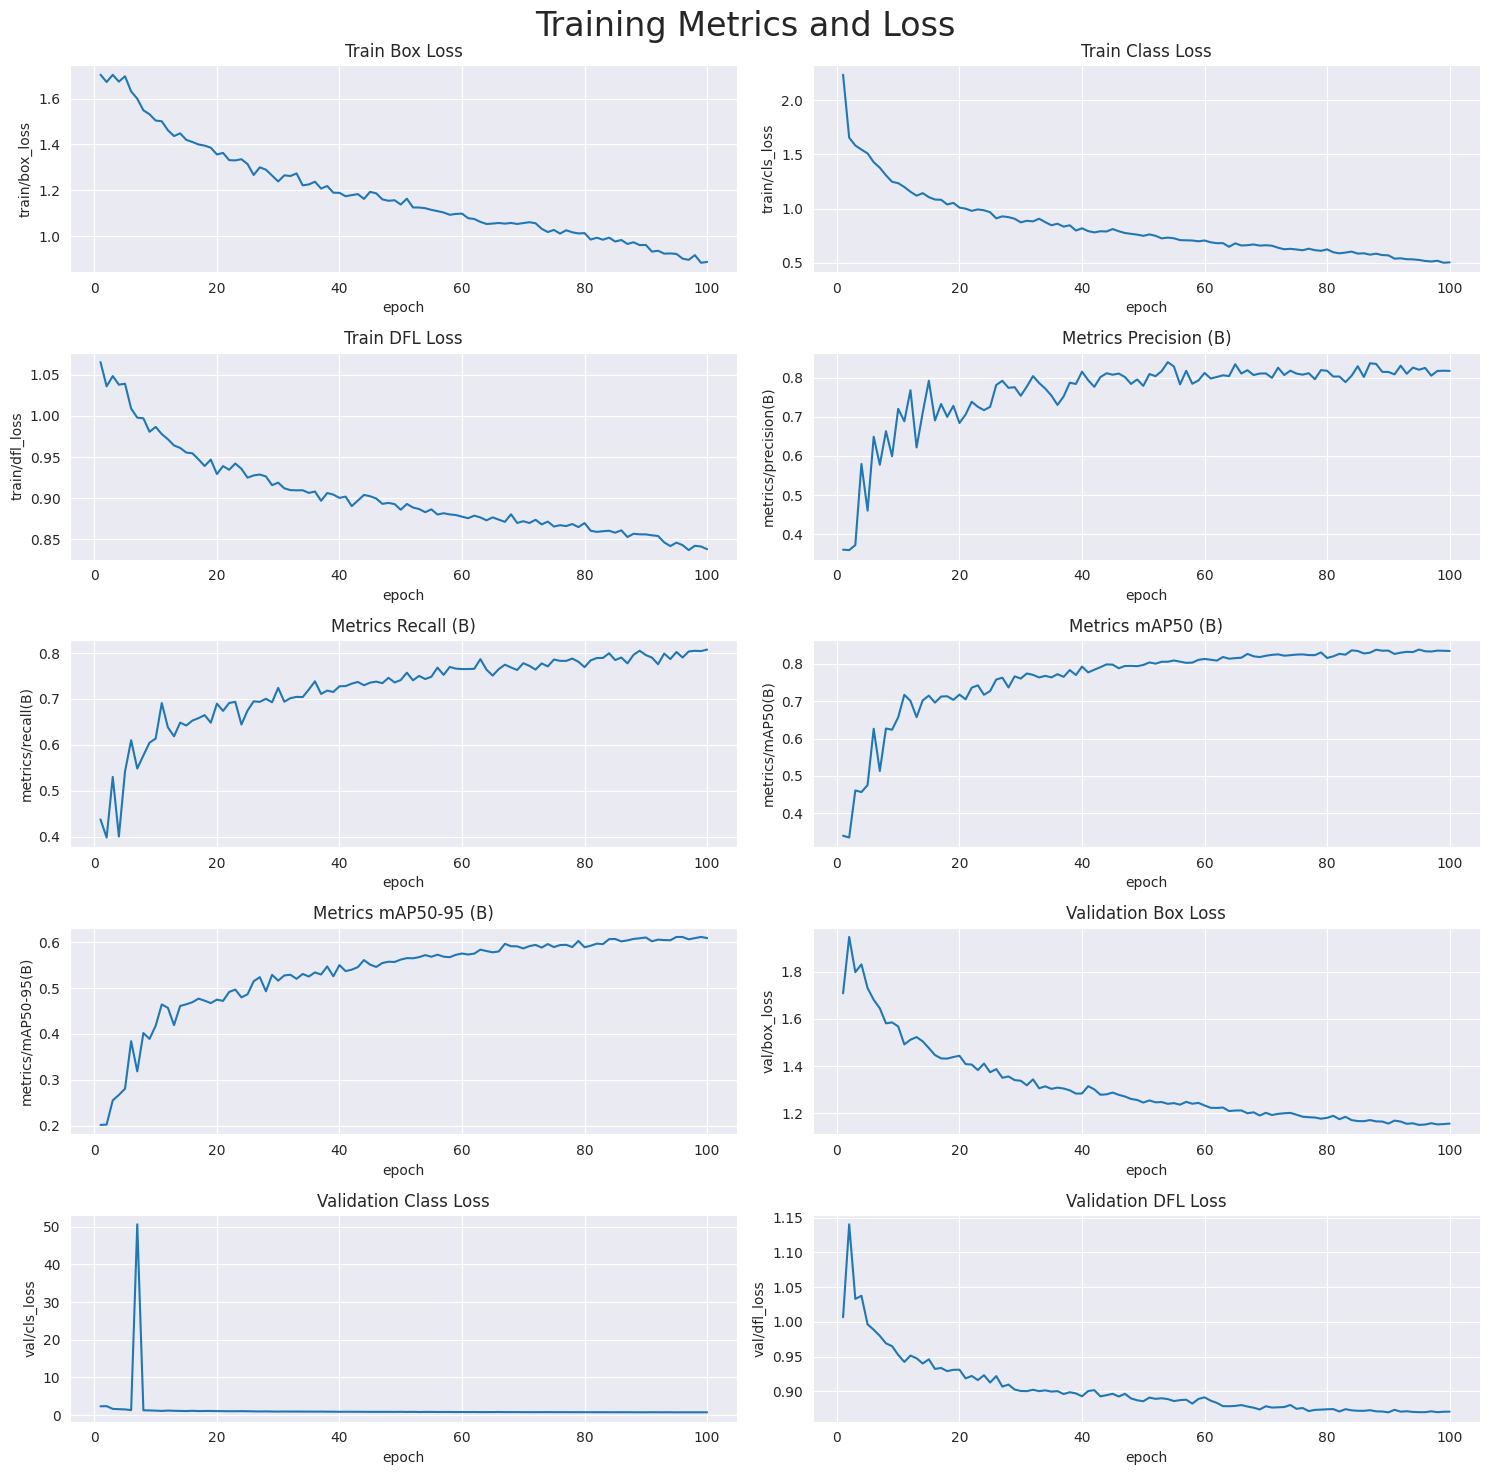

In [9]:
# read in the results.csv file as a pandas dataframe
df = pd.read_csv('/kaggle/working/yolo8/result/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()

# Results

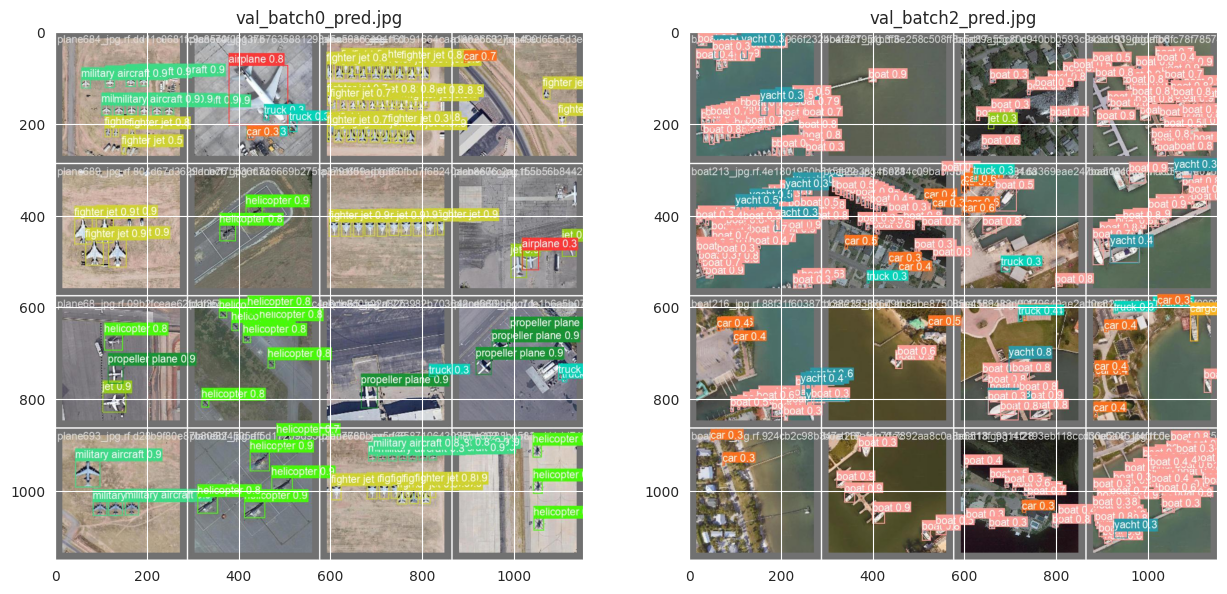

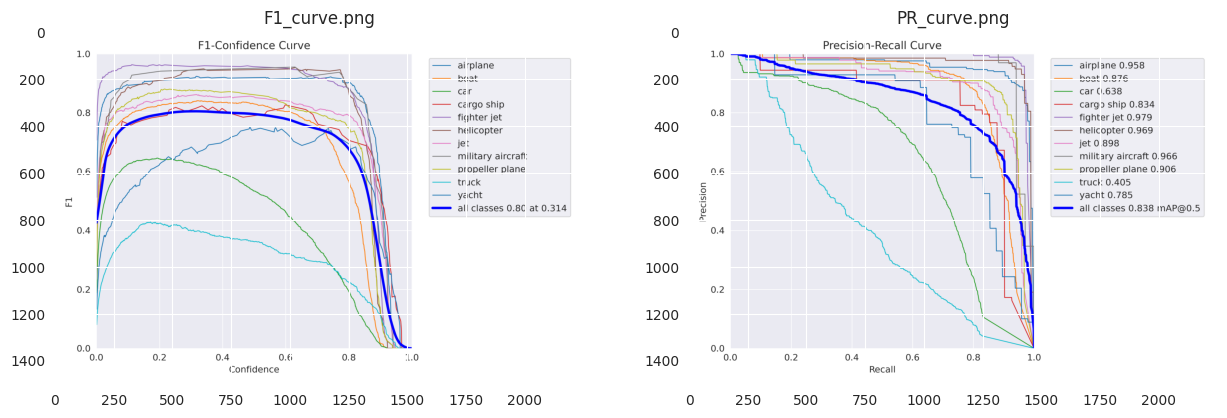

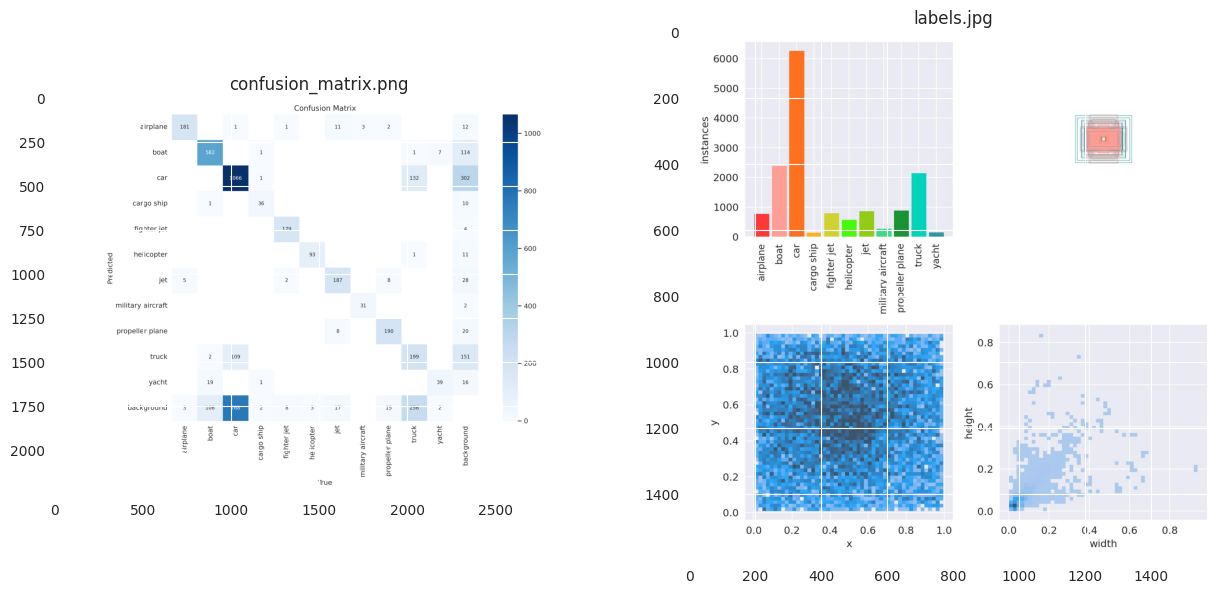

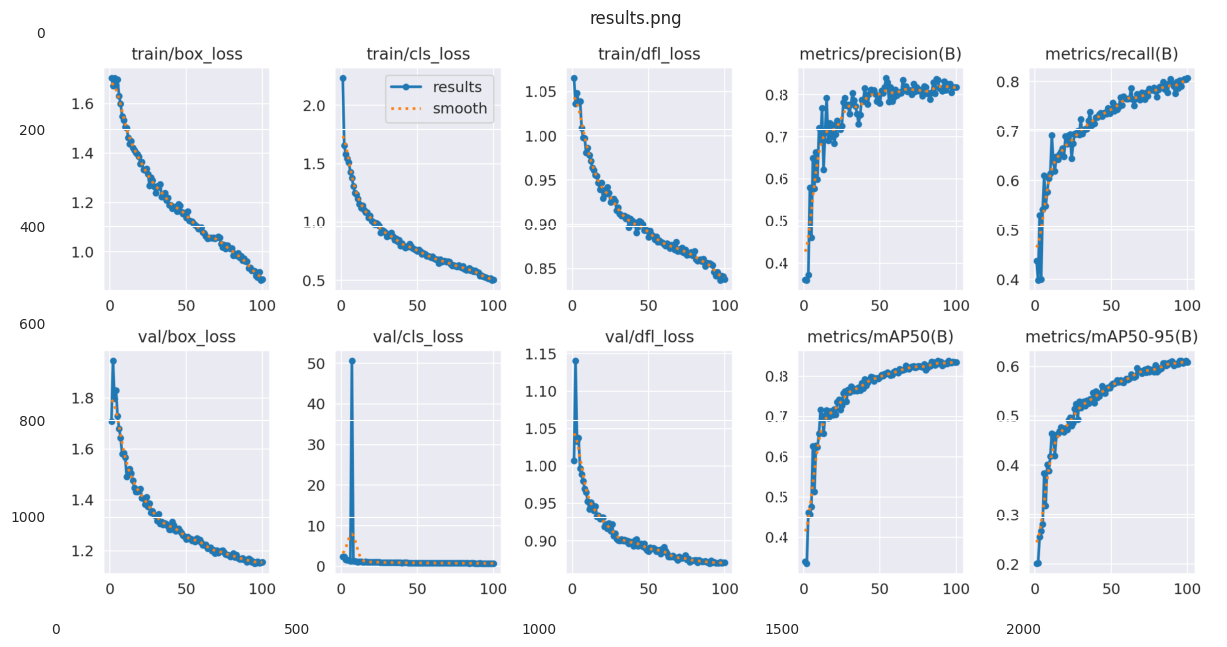

In [10]:
model_path = '/kaggle/working/yolo8/result/'

def plot(ls, size):
    c = 1
    plt.figure(figsize=(15, 10))
    for im in ls:
        plt.subplot(size[0], size[1], c)
        img = plt.imread(model_path + im)
        plt.imshow(img)
        plt.title(im)
        c += 1
    plt.show()

# Visualize images and plots
plot(['val_batch0_pred.jpg', 'val_batch2_pred.jpg'], (1, 2))
plot(['F1_curve.png', 'PR_curve.png'], (1, 2))
plot(['confusion_matrix.png', 'labels.jpg'], (1, 2))
plot(['results.png'], (1, 1))


# Prediction

In [11]:
# Function to perform ship detections
def ship_detect(img_path):
    
    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()
    
    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    
    return detect_img


0: 256x256 4 boats, 15.7ms
Speed: 1.1ms preprocess, 15.7ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 3 cars, 3 trucks, 15.2ms
Speed: 0.8ms preprocess, 15.2ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 1 car, 15.2ms
Speed: 0.9ms preprocess, 15.2ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 1 boat, 15.3ms
Speed: 1.0ms preprocess, 15.3ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 1 car, 4 trucks, 15.3ms
Speed: 0.8ms preprocess, 15.3ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 1 boat, 15.4ms
Speed: 0.8ms preprocess, 15.4ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 4 cars, 15.1ms
Speed: 0.8ms preprocess, 15.1ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 2 military aircrafts, 15.5ms
Speed: 0.7ms preprocess, 15.5ms inference, 1.4ms postprocess per image a

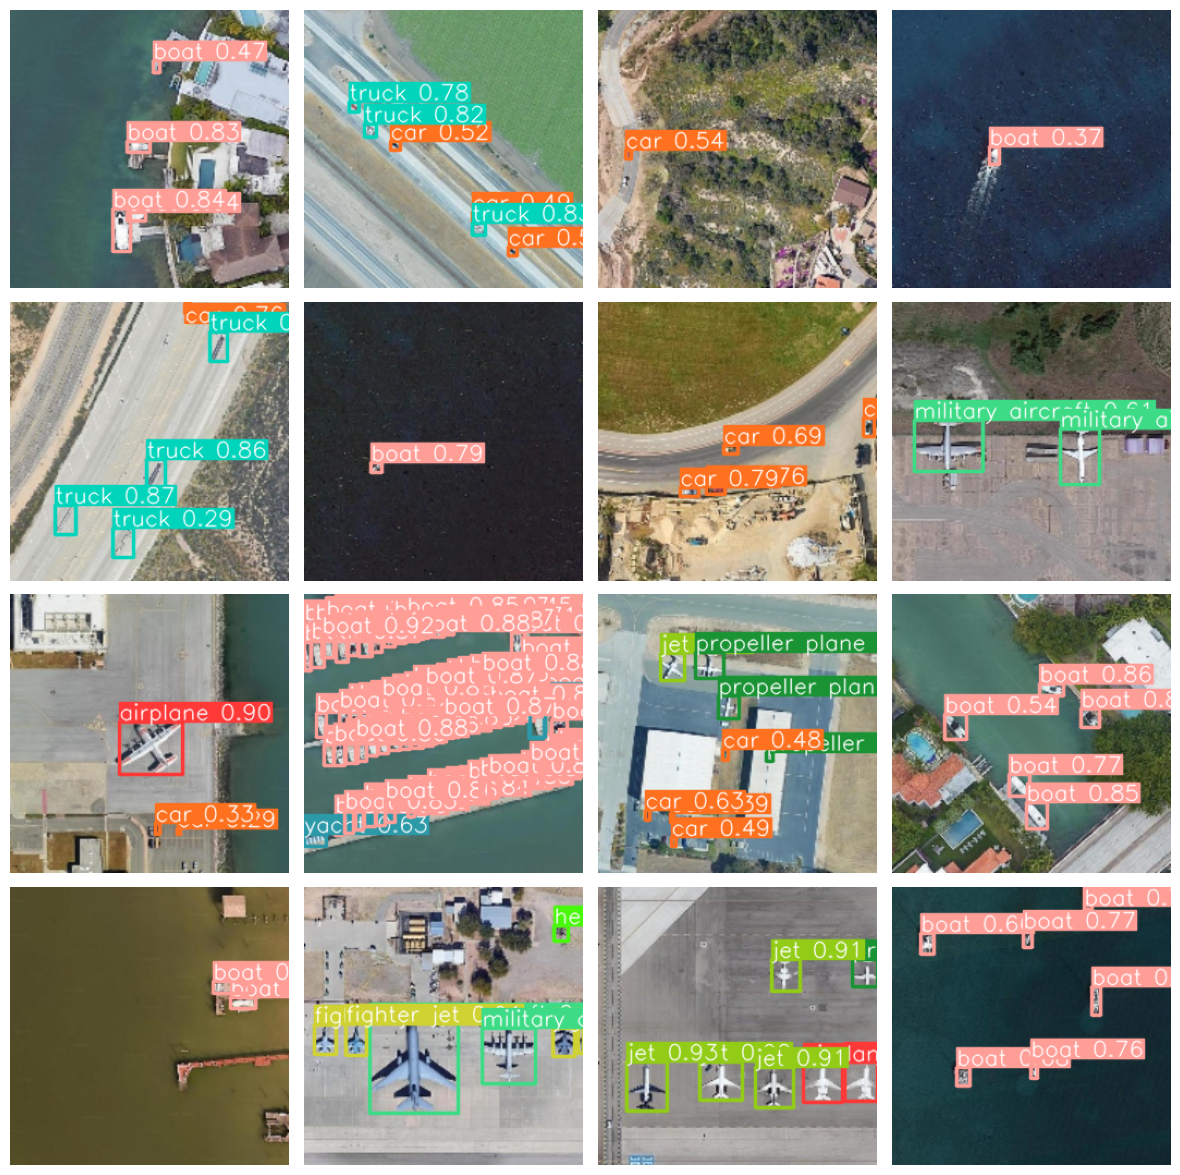

In [12]:
import random

# Define the directory where the custom images are stored
custom_image_dir = '/kaggle/input/sr-det/sat-low-256x256/test/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 16)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):
    
    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4
    
    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = ship_detect(img_path)
    
    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)